# Import

In [2]:
import json
from collections import OrderedDict
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

# Plot results from heuristic evaluation in planner for a single step

In [2]:
JSON_PATH = "/raid/home/frosa_Loc/period_abroad/heuristic-computation/planning-learning-heuristic/baseline_evaluation/test_heuristic.json"

In [3]:
with open(JSON_PATH, 'r') as f:
    data = json.load(f)

print(data)

{'blocks_world/easy/5/task05.pddl': {'h-max': {'nodes_expanded': 49, 'plan_length': 10, 'heuristic_calls': 101, 'heuristic_val_for_initial_state': 5, 'search_time': 0.026145524345338345, 'search_state': 'success'}, 'h-add': {'nodes_expanded': 12, 'plan_length': 10, 'heuristic_calls': 32, 'heuristic_val_for_initial_state': 12, 'search_time': 0.006916848011314869, 'search_state': 'success'}, 'lm-cut': {'nodes_expanded': 12, 'plan_length': 10, 'heuristic_calls': 28, 'heuristic_val_for_initial_state': 7.0, 'search_time': 0.025326869450509548, 'search_state': 'success'}, 'h-ff': {'nodes_expanded': 17, 'plan_length': 10, 'heuristic_calls': 41, 'heuristic_val_for_initial_state': 7, 'search_time': 0.009631412103772163, 'search_state': 'success'}, 'blind': {'nodes_expanded': 195, 'plan_length': 10, 'heuristic_calls': 316, 'heuristic_val_for_initial_state': 1, 'search_time': 0.005003694444894791, 'search_state': 'success'}, 'strips-hgn': {'nodes_expanded': 22, 'plan_length': 10, 'heuristic_calls

In [10]:
# Divide results based on complexity
num_block_dict = OrderedDict()
for pddl_file in data.keys():
    # print(pddl_file)
    num_block = pddl_file.split('/')[-2]
    # print(num_block)
    if num_block_dict.get(num_block, None) is None:
        num_block_dict[num_block] = []
    num_block_dict[num_block].append(data[pddl_file])
 
# print(num_block_dict)   
    
#
avg_node_expanded = OrderedDict()
avg_search_time = OrderedDict()
avg_plan_length = OrderedDict()
avg_heuristic_calls = OrderedDict()
cnt_success = OrderedDict()
for num_block in num_block_dict.keys():
    print(f"Complexity {num_block}")
    if avg_node_expanded.get(num_block, None) is None:
        avg_node_expanded[num_block] = OrderedDict()
        avg_search_time[num_block] = OrderedDict()
        avg_plan_length[num_block] = OrderedDict()
        avg_heuristic_calls[num_block] = OrderedDict()
        cnt_success[num_block] = OrderedDict()
    
    for problem in num_block_dict[num_block]:
        # print(problem)    
    
        for method in problem.keys():
            # print(method)
            # if method != 'strips-hgn':
            #     print(f"Method {method} - plan length {problem[method]['plan_length']}")
            if avg_node_expanded[num_block].get(method, None) is None:
                avg_node_expanded[num_block][method] = 0.0
                avg_search_time[num_block][method] = 0.0
                avg_plan_length[num_block][method] = 0.0
                avg_heuristic_calls[num_block][method] = 0.0
                cnt_success[num_block][method] = 0.0
            
            avg_node_expanded[num_block][method] += problem[method]['nodes_expanded']
            avg_search_time[num_block][method] += problem[method]['search_time']
            avg_heuristic_calls[num_block][method] += problem[method]['heuristic_calls']
            avg_plan_length[num_block][method] += problem[method]['plan_length'] if problem[method]['search_state'] == 'success' else 0
            cnt_success[num_block][method] += 1 if problem[method]['search_state'] == 'success' else 0
    
    for method in problem.keys():
        avg_node_expanded[num_block][method] = avg_node_expanded[num_block][method] / len(num_block_dict[num_block])
        avg_search_time[num_block][method] = round(avg_search_time[num_block][method] / len(num_block_dict[num_block]), 3)
        avg_plan_length[num_block][method] = avg_plan_length[num_block][method] / \
            cnt_success[num_block][method] if cnt_success[num_block][method] != 0 else 0
        avg_heuristic_calls[num_block][method] = avg_heuristic_calls[num_block][method] / len(num_block_dict[num_block])    

print(f"Avg expanded node: {avg_node_expanded}")
print(f"Avg search time: {avg_search_time}")
print(f"Avg plan length: {avg_plan_length}")
print(f"Avg heuristic calls: {avg_heuristic_calls}")
print(f"Cnt success: {cnt_success}")

# create bar plot for each metric 

Complexity 5
Complexity 6
Complexity 7
Complexity 8
Complexity 9
Complexity 10
Avg expanded node: OrderedDict([('5', OrderedDict([('h-max', 98.4), ('h-add', 22.0), ('lm-cut', 24.5), ('h-ff', 33.9), ('blind', 323.7), ('strips-hgn', 13.6)])), ('6', OrderedDict([('h-max', 643.9), ('h-add', 39.7), ('lm-cut', 33.8), ('h-ff', 52.3), ('blind', 2882.2), ('strips-hgn', 17.4)])), ('7', OrderedDict([('h-max', 3920.3), ('h-add', 55.7), ('lm-cut', 83.7), ('h-ff', 135.1), ('blind', 22358.8), ('strips-hgn', 22.2)])), ('8', OrderedDict([('h-max', 77981.3), ('h-add', 143.7), ('lm-cut', 482.0), ('h-ff', 945.6), ('blind', 378580.4), ('strips-hgn', 36.8)])), ('9', OrderedDict([('h-max', 119370.7), ('h-add', 308.9), ('lm-cut', 764.9), ('h-ff', 1441.5), ('blind', 2811365.3), ('strips-hgn', 36.7)])), ('10', OrderedDict([('h-max', 74056.9), ('h-add', 370.4), ('lm-cut', 2080.4), ('h-ff', 5900.0), ('blind', 2556560.7), ('strips-hgn', 43.7)]))])
Avg search time: OrderedDict([('5', OrderedDict([('h-max', 0.052), 

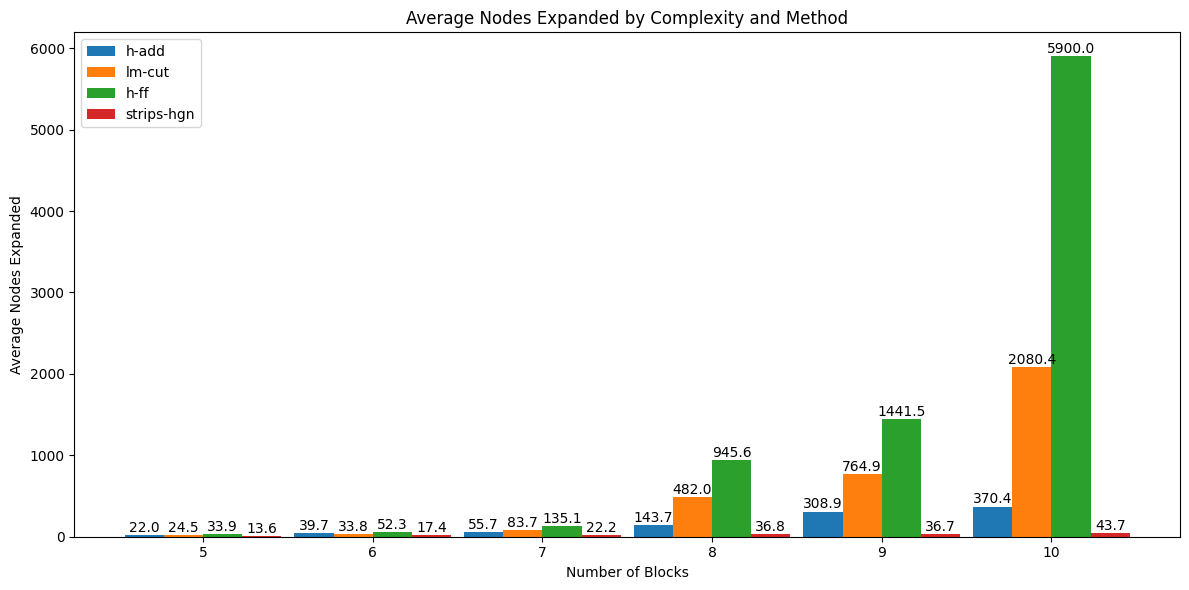

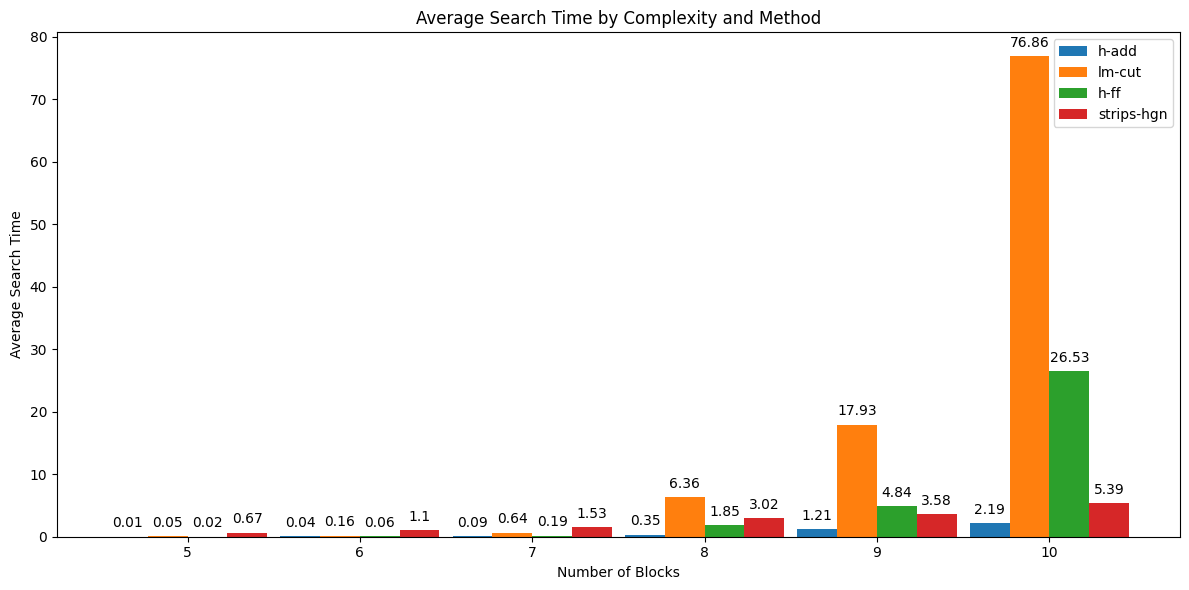

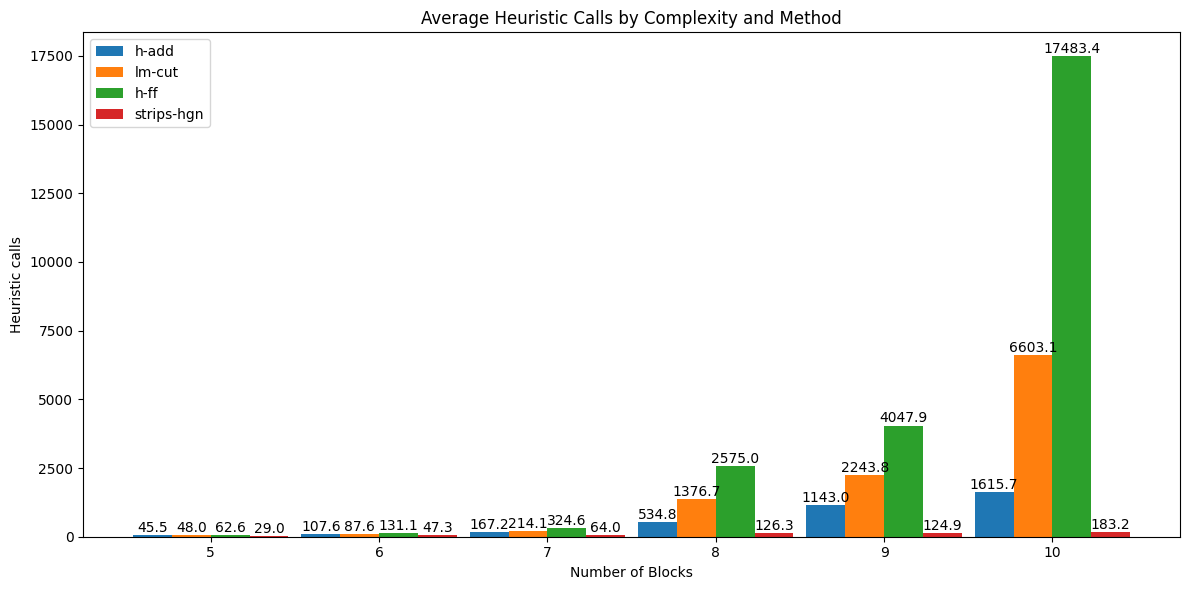

In [11]:
# List of complexities (num_blocks)
complexities = list(avg_node_expanded.keys())

# List of methods
methods = list()
for method in avg_node_expanded[complexities[0]].keys():
    if method != 'blind' and method != 'h-max':
        methods.append(method)

# Data for plotting
node_expanded_data = list()
for complexity in complexities:
    method_data = list()
    for method in methods:
        method_data.append(avg_node_expanded[complexity][method])
    node_expanded_data.append(method_data)

search_time_data = list()
for complexity in complexities:
    method_data = list()
    for method in methods:
        method_data.append(avg_search_time[complexity][method])
    search_time_data.append(method_data)

plan_length_data = list()
for complexity in complexities:
    method_data = list()
    for method in methods:
        method_data.append(avg_plan_length[complexity][method])
    plan_length_data.append(method_data)

heuristic_calls_data = list()
for complexity in complexities:
    method_data = list()
    for method in methods:
        method_data.append(avg_heuristic_calls[complexity][method])
    heuristic_calls_data.append(method_data)


# Convert data to numpy arrays for plotting
node_expanded_data = np.array(node_expanded_data)
search_time_data = np.array(search_time_data)
plan_length_data = np.array(plan_length_data)
heuristic_calls_data = np.array(heuristic_calls_data)


def plot_grouped_bar_with_annotations(data, complexities, methods, ylabel, title):
    width=0.30
    space_between_groups = 0.20
    plt.figure(figsize=(12, 6))

    x = np.arange(0, 1.3*len(complexities), 1.3)  # x-axis locations for the groups
    
    for i, method in enumerate(methods):
        xdata = x + (i * width) 
        plt.bar(xdata, data[:, i], width=width, label=method)
        # Add annotations above each bar
        for j, val in enumerate(data[:, i]):
            plt.text(xdata[j], val + 1, str(round(val, 2)),
                     ha='center', va='bottom')

    plt.xlabel('Number of Blocks')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(x + ((len(methods) - 1) * (width) / 2), complexities)
    plt.legend()
    plt.tight_layout()
    plt.show()

    
# Plotting for Average Nodes Expanded
plot_grouped_bar_with_annotations(
    node_expanded_data, complexities, methods, 'Average Nodes Expanded', 'Average Nodes Expanded by Complexity and Method')

# Plotting for Average Search Time
plot_grouped_bar_with_annotations(
    search_time_data, complexities, methods, 'Average Search Time', 'Average Search Time by Complexity and Method')

# Plotting for Average Plan Length
# plot_grouped_bar_with_annotations(
#     plan_length_data, 'Average Plan Length', 'Average Plan Length by Complexity and Method')

plot_grouped_bar_with_annotations(
    heuristic_calls_data, complexities, methods, 'Heuristic calls', 'Average Heuristic Calls by Complexity and Method')

# Plot results from heuristic evaluation in planner for multiple step

In [3]:
JSON_PATH = "/raid/home/frosa_Loc/period_abroad/heuristic-computation/planning-learning-heuristic/baseline_evaluation/heuristic_test/num_step_*.json"

test_paths = glob.glob(JSON_PATH)

test_paths = sorted(
    test_paths, key=lambda x: int(x.split('_')[-1].split('.')[0]))

print(test_paths)

['/raid/home/frosa_Loc/period_abroad/heuristic-computation/planning-learning-heuristic/baseline_evaluation/heuristic_test/num_step_1.json', '/raid/home/frosa_Loc/period_abroad/heuristic-computation/planning-learning-heuristic/baseline_evaluation/heuristic_test/num_step_2.json', '/raid/home/frosa_Loc/period_abroad/heuristic-computation/planning-learning-heuristic/baseline_evaluation/heuristic_test/num_step_3.json', '/raid/home/frosa_Loc/period_abroad/heuristic-computation/planning-learning-heuristic/baseline_evaluation/heuristic_test/num_step_4.json', '/raid/home/frosa_Loc/period_abroad/heuristic-computation/planning-learning-heuristic/baseline_evaluation/heuristic_test/num_step_5.json', '/raid/home/frosa_Loc/period_abroad/heuristic-computation/planning-learning-heuristic/baseline_evaluation/heuristic_test/num_step_6.json', '/raid/home/frosa_Loc/period_abroad/heuristic-computation/planning-learning-heuristic/baseline_evaluation/heuristic_test/num_step_7.json', '/raid/home/frosa_Loc/peri

In [31]:
avg_node_expanded = OrderedDict()
avg_search_time = OrderedDict()
avg_plan_length = OrderedDict()
avg_heuristic_calls = OrderedDict()
cnt_success = OrderedDict()

node_expanded_std = OrderedDict()
search_time_std = OrderedDict()
plan_length_std = OrderedDict()
heuristic_calls_std = OrderedDict()


# For each step
for test_path in test_paths:
    with open(test_path, 'r') as f:
        data = json.load(f)

    step = test_path.split('_')[-1].split('.')[0]
    print(step)

    num_block_dict = OrderedDict()
    for pddl_file in data.keys():
        num_block = pddl_file.split('/')[-2]
        if num_block_dict.get(num_block, None) is None:
            num_block_dict[num_block] = []
        num_block_dict[num_block].append(data[pddl_file])

    avg_node_expanded[step] = OrderedDict()
    avg_search_time[step] = OrderedDict()
    avg_plan_length[step] = OrderedDict()
    avg_heuristic_calls[step] = OrderedDict()
    cnt_success[step] = OrderedDict()

    node_expanded_std[step] = OrderedDict()
    search_time_std[step] = OrderedDict()
    plan_length_std[step] = OrderedDict()
    heuristic_calls_std[step] = OrderedDict()

    # For each number of block
    for num_block in num_block_dict.keys():
        print(f"Complexity {num_block}")
        if avg_node_expanded[step].get(num_block, None) is None:
            avg_node_expanded[step][num_block] = OrderedDict()
            avg_search_time[step][num_block] = OrderedDict()
            avg_plan_length[step][num_block] = OrderedDict()
            avg_heuristic_calls[step][num_block] = OrderedDict()
            cnt_success[step][num_block] = OrderedDict()

            node_expanded_std[step][num_block] = OrderedDict()
            search_time_std[step][num_block] = OrderedDict()
            plan_length_std[step][num_block] = OrderedDict()
            heuristic_calls_std[step][num_block] = OrderedDict()

        
        node_expanded = OrderedDict()
        search_time = OrderedDict()
        plan_length = OrderedDict()
        heuristic_calls = OrderedDict()
        # for each problem
        for problem in num_block_dict[num_block]:
            # for each metho in the problem
            for method in problem.keys():
                if method != 'blind' and method != 'h-max':
                    # for each problem of the method
                    if node_expanded.get(method, None) is None:
                        node_expanded[method] = []
                        search_time[method] = []
                        plan_length[method] = []
                        heuristic_calls[method] = []
                        cnt_success[step][num_block][method] = 0
                    
                    node_expanded[method].append(
                        problem[method]['nodes_expanded'])
                    search_time[method].append(
                        problem[method]['search_time'])
                    heuristic_calls[method].append(
                        problem[method]['heuristic_calls'])
                    if problem[method]['search_state'] == 'success':
                        plan_length[method].append(
                            problem[method]['plan_length'])
                        cnt_success[step][num_block][method] += 1

        # Once I completed all the problems for a specific method, with a specific number of block, for a specific step, compute the mean and std_deviation
        for method in problem.keys():
            if method != 'blind' and method != 'h-max':
                avg_node_expanded[step][num_block][method] = np.mean(
                    node_expanded[method])
                avg_search_time[step][num_block][method] = round(
                    np.mean(search_time[method]), 3)
                avg_plan_length[step][num_block][method] = np.mean(
                    plan_length[method]) if cnt_success[step][num_block][method] != 0 else 0
                avg_heuristic_calls[step][num_block][method] = np.mean(
                    heuristic_calls[method])

                node_expanded_std[step][num_block][method] = np.std(
                    node_expanded[method])
                search_time_std[step][num_block][method] = np.std(
                    search_time[method])
                plan_length_std[step][num_block][method] = np.std(
                    plan_length[method])
                heuristic_calls_std[step][num_block][method] = np.std(
                    heuristic_calls[method])

    print(f"Avg expanded node: {avg_node_expanded[step]}")
    print(f"Avg search time: {avg_search_time[step]}")
    print(f"Avg plan length: {avg_plan_length[step]}")
    print(f"Avg heuristic calls: {avg_heuristic_calls[step]}")
    print(f"Cnt success: {cnt_success[step]}")

1
Complexity 5
Complexity 6
Complexity 7
Complexity 8
Complexity 9
Complexity 10
Avg expanded node: OrderedDict([('5', OrderedDict([('h-add', 22.0), ('lm-cut', 24.5), ('h-ff', 33.9), ('strips-hgn', 18.8)])), ('6', OrderedDict([('h-add', 39.7), ('lm-cut', 35.3), ('h-ff', 52.7), ('strips-hgn', 28.9)])), ('7', OrderedDict([('h-add', 55.0), ('lm-cut', 83.3), ('h-ff', 134.7), ('strips-hgn', 30.5)])), ('8', OrderedDict([('h-add', 148.6), ('lm-cut', 482.6), ('h-ff', 947.6), ('strips-hgn', 81.9)])), ('9', OrderedDict([('h-add', 342.0), ('lm-cut', 762.4), ('h-ff', 1446.7), ('strips-hgn', 112.5)])), ('10', OrderedDict([('h-add', 364.8), ('lm-cut', 2807.9), ('h-ff', 5899.6), ('strips-hgn', 73.8)]))])
Avg search time: OrderedDict([('5', OrderedDict([('h-add', 0.012), ('lm-cut', 0.061), ('h-ff', 0.017), ('strips-hgn', 0.129)])), ('6', OrderedDict([('h-add', 0.037), ('lm-cut', 0.156), ('h-ff', 0.048), ('strips-hgn', 0.28)])), ('7', OrderedDict([('h-add', 0.073), ('lm-cut', 0.578), ('h-ff', 0.163), (

{'1': ['h-add', 'strips-hgn'], '2': ['strips-hgn'], '3': ['strips-hgn'], '4': ['strips-hgn'], '5': ['strips-hgn'], '6': ['strips-hgn'], '7': ['strips-hgn'], '8': ['strips-hgn'], '9': ['strips-hgn'], '10': ['strips-hgn']}
Method h-add - Method_indx 0
Method h-add - Step 1 - Step_indx 0
Method strips-hgn - Method_indx 1
Method strips-hgn - Step 1 - Step_indx 0
Method strips-hgn - Method_indx 0
Method strips-hgn - Step 2 - Step_indx 1
Method strips-hgn - Method_indx 0
Method strips-hgn - Step 3 - Step_indx 2
Method strips-hgn - Method_indx 0
Method strips-hgn - Step 4 - Step_indx 3
Method strips-hgn - Method_indx 0
Method strips-hgn - Step 5 - Step_indx 4
Method strips-hgn - Method_indx 0
Method strips-hgn - Step 6 - Step_indx 5
Method strips-hgn - Method_indx 0
Method strips-hgn - Step 7 - Step_indx 6
Method strips-hgn - Method_indx 0
Method strips-hgn - Step 8 - Step_indx 7
Method strips-hgn - Method_indx 0
Method strips-hgn - Step 9 - Step_indx 8
Method strips-hgn - Method_indx 0
Metho

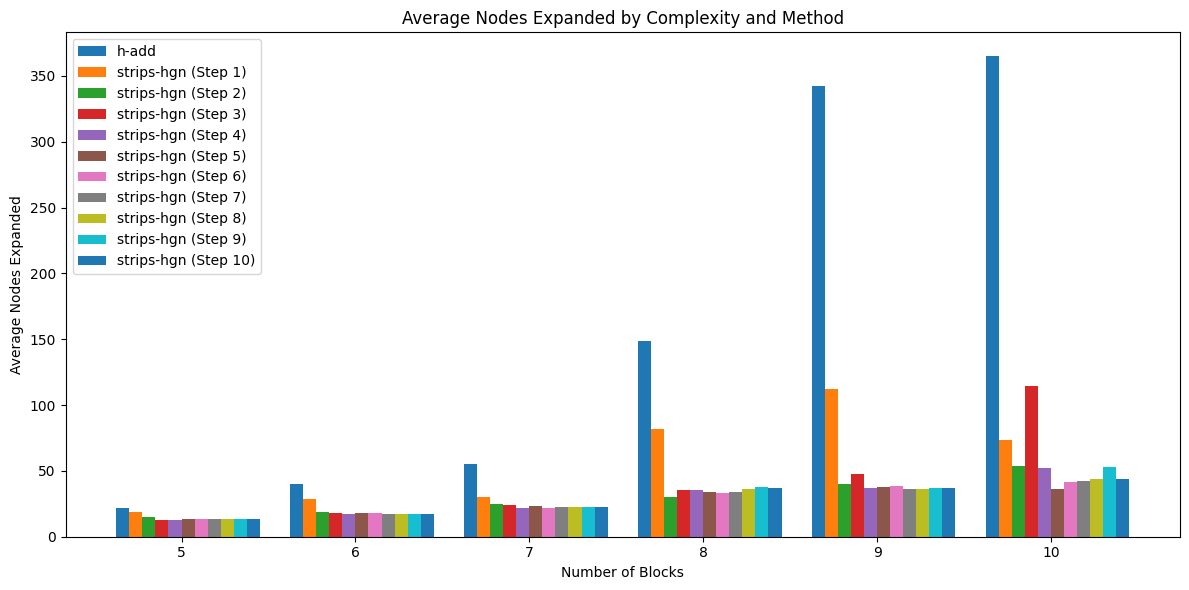

Method h-add - Method_indx 0
Method h-add - Step 1 - Step_indx 0
Method strips-hgn - Method_indx 1
Method strips-hgn - Step 1 - Step_indx 0
Method strips-hgn - Method_indx 0
Method strips-hgn - Step 2 - Step_indx 1
Method strips-hgn - Method_indx 0
Method strips-hgn - Step 3 - Step_indx 2
Method strips-hgn - Method_indx 0
Method strips-hgn - Step 4 - Step_indx 3
Method strips-hgn - Method_indx 0
Method strips-hgn - Step 5 - Step_indx 4
Method strips-hgn - Method_indx 0
Method strips-hgn - Step 6 - Step_indx 5
Method strips-hgn - Method_indx 0
Method strips-hgn - Step 7 - Step_indx 6
Method strips-hgn - Method_indx 0
Method strips-hgn - Step 8 - Step_indx 7
Method strips-hgn - Method_indx 0
Method strips-hgn - Step 9 - Step_indx 8
Method strips-hgn - Method_indx 0
Method strips-hgn - Step 10 - Step_indx 9


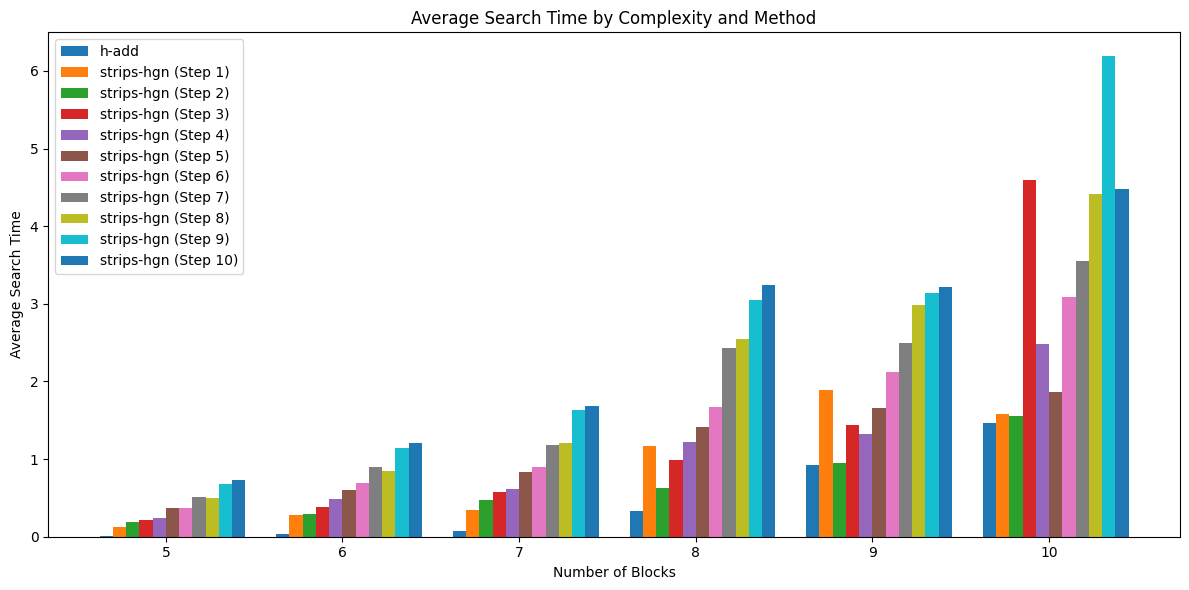

Method h-add - Method_indx 0
Method h-add - Step 1 - Step_indx 0
Method strips-hgn - Method_indx 1
Method strips-hgn - Step 1 - Step_indx 0
Method strips-hgn - Method_indx 0
Method strips-hgn - Step 2 - Step_indx 1
Method strips-hgn - Method_indx 0
Method strips-hgn - Step 3 - Step_indx 2
Method strips-hgn - Method_indx 0
Method strips-hgn - Step 4 - Step_indx 3
Method strips-hgn - Method_indx 0
Method strips-hgn - Step 5 - Step_indx 4
Method strips-hgn - Method_indx 0
Method strips-hgn - Step 6 - Step_indx 5
Method strips-hgn - Method_indx 0
Method strips-hgn - Step 7 - Step_indx 6
Method strips-hgn - Method_indx 0
Method strips-hgn - Step 8 - Step_indx 7
Method strips-hgn - Method_indx 0
Method strips-hgn - Step 9 - Step_indx 8
Method strips-hgn - Method_indx 0
Method strips-hgn - Step 10 - Step_indx 9


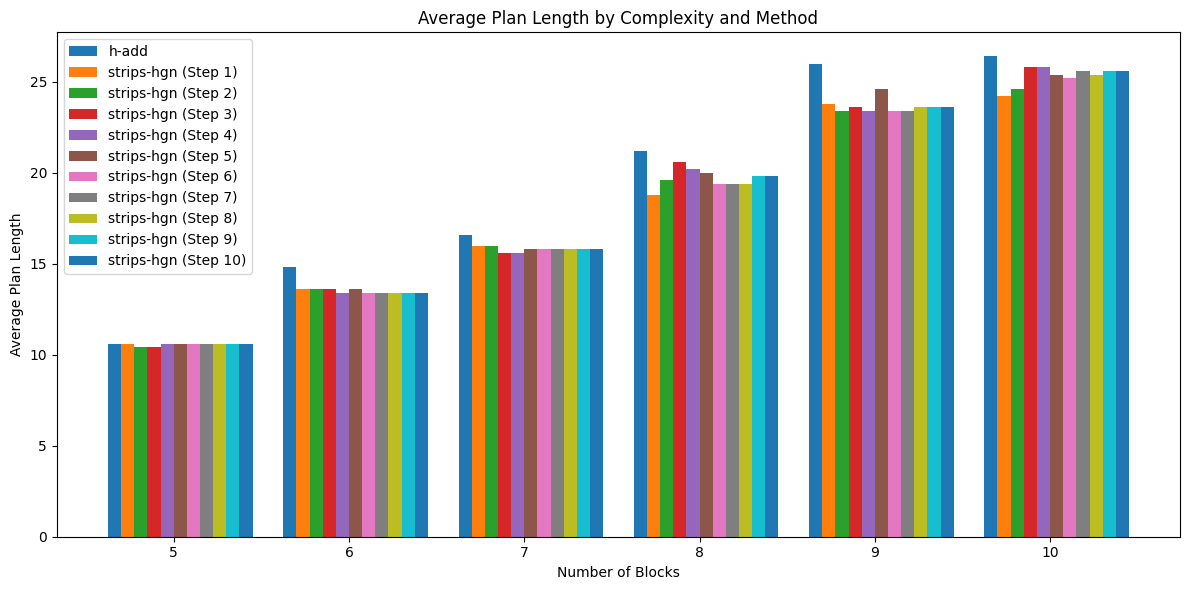

Method h-add - Method_indx 0
Method h-add - Step 1 - Step_indx 0
Method strips-hgn - Method_indx 1
Method strips-hgn - Step 1 - Step_indx 0
Method strips-hgn - Method_indx 0
Method strips-hgn - Step 2 - Step_indx 1
Method strips-hgn - Method_indx 0
Method strips-hgn - Step 3 - Step_indx 2
Method strips-hgn - Method_indx 0
Method strips-hgn - Step 4 - Step_indx 3
Method strips-hgn - Method_indx 0
Method strips-hgn - Step 5 - Step_indx 4
Method strips-hgn - Method_indx 0
Method strips-hgn - Step 6 - Step_indx 5
Method strips-hgn - Method_indx 0
Method strips-hgn - Step 7 - Step_indx 6
Method strips-hgn - Method_indx 0
Method strips-hgn - Step 8 - Step_indx 7
Method strips-hgn - Method_indx 0
Method strips-hgn - Step 9 - Step_indx 8
Method strips-hgn - Method_indx 0
Method strips-hgn - Step 10 - Step_indx 9


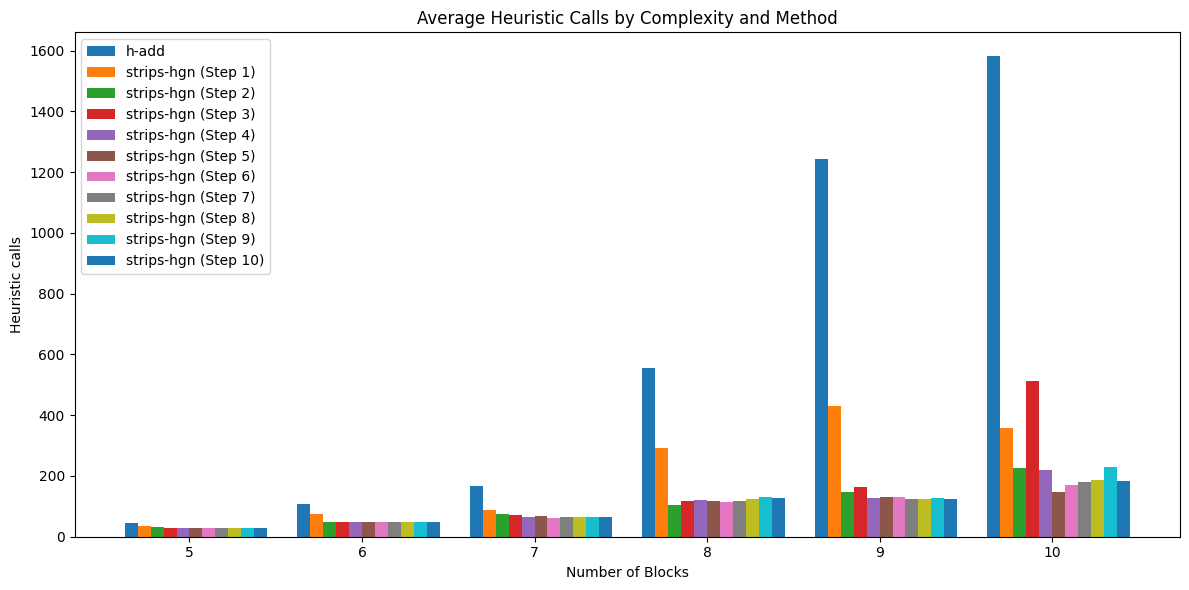

In [38]:
# List of steps
steps = list(avg_node_expanded.keys())

# List of complexities (num_blocks)
complexities = list(avg_node_expanded[steps[0]].keys())

# List of methods for each step
all_methods = {step: [method for method in avg_node_expanded[step][complexities[0]].keys(
) if 'add' in method or 'strips' in method] for step in steps}
print(all_methods)

# Data for plotting


def extract_data(metric_dict, std_dict):
    data = []
    std = []
    for step in steps:
        step_data = []
        step_std = []
        for complexity in complexities:
            method_data = []
            method_std = []
            for method in all_methods[step]:
                if method in metric_dict[step][complexity].keys():
                    method_data.append(metric_dict[step][complexity][method])
                    method_std.append(std_dict[step][complexity][method])
                else:
                    method_data.append(np.nan)  # Use NaN to mark missing data
                    method_std.append(np.nan)
            step_data.append(method_data)
            step_std.append(method_std)
        data.append(np.array(step_data))
        std.append(np.array(step_std))
    return data, std


node_expanded_data, node_expanded_std_data = extract_data(
    avg_node_expanded, node_expanded_std)
search_time_data, search_time_std_data = extract_data(
    avg_search_time, search_time_std)
plan_length_data, plan_length_std_data = extract_data(
    avg_plan_length, plan_length_std)
heuristic_calls_data, heuristic_calls_std_data = extract_data(
    avg_heuristic_calls, heuristic_calls_std)


def plot_grouped_bar_with_annotations(data, std, complexities, ylabel, title, steps):
    width = 0.15
    plt.figure(figsize=(12, 6))

    # x-axis locations for the groups  # x-axis locations for the groups
    x = np.arange(0, 2*len(complexities), 2)
    space_slot = 0

    for step_idx, step in enumerate(steps):
        for method_idx, method in enumerate(all_methods[step]):
            print(f"Method {method} - Method_indx {method_idx}")
            print(f"Method {method} - Step {step} - Step_indx {step_idx}")
            method_data = data[step_idx][:, method_idx]
            if std is not None:
                method_std = std[step_idx][:, method_idx]
            valid_data_mask = ~np.isnan(method_data)
            xdata = x[valid_data_mask] + (space_slot * width)
            if 'strips' not in method:
                label = method
            else:
                label = f"{method} (Step {step})"
            if std is not None: 
                plt.bar(xdata, method_data[valid_data_mask], yerr=method_std[valid_data_mask],
                        width=width, capsize=5, label=label)
            else:
                plt.bar(xdata, method_data[valid_data_mask], width=width, capsize=5, label=label)

            # # Add annotations above each bar
            # for k, val in enumerate(method_data[valid_data_mask]):
            #     plt.text(xdata[k], val + 1, str(round(val, 2)),
            #              ha='center', va='bottom')

            space_slot += 1

    plt.xlabel('Number of Blocks')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(x + ((len(steps) - 1) * width) / 2, complexities)
    plt.legend()
    plt.tight_layout()
    plt.show()


# Plotting for Average Nodes Expanded
plot_grouped_bar_with_annotations(
    node_expanded_data, None, complexities, 'Average Nodes Expanded', 'Average Nodes Expanded by Complexity and Method', steps)

# Plotting for Average Search Time
plot_grouped_bar_with_annotations(
    search_time_data, None, complexities, 'Average Search Time', 'Average Search Time by Complexity and Method', steps)

# Plotting for Average Plan Length
plot_grouped_bar_with_annotations(
    plan_length_data, None, complexities, 'Average Plan Length', 'Average Plan Length by Complexity and Method', steps)

# Plotting for Average Heuristic Calls
plot_grouped_bar_with_annotations(
    heuristic_calls_data, None, complexities, 'Heuristic calls', 'Average Heuristic Calls by Complexity and Method', steps)

# Plot results of STRIP-GCN on heuristic

## Generalization with the same training object distribution

In [41]:
# JSON_PATH = "/raid/home/frosa_Loc/period_abroad/heuristic-computation/planning-learning-heuristic/STRIPS-HGN/results/train-strips-hgn-2024-06-14T15:36:31.043115/train-strips-hgn-2024-06-14T15:36:31.043115/generalization_distribution/test_stat.json"

JSON_PATH = "/raid/home/frosa_Loc/period_abroad/heuristic-computation/planning-learning-heuristic/STRIPS-HGN/results/train-strips-hgn-2024-06-14T15:36:31.043115/train-strips-hgn-2024-06-14T15:36:31.043115/generalization_distribution_step*"


In [42]:
test_paths = glob.glob(os.path.join(JSON_PATH, "test_stat.json"))

test_paths =  sorted(
    test_paths, key=lambda x: int(x.split('step_')[1].split('/')[0]))

print(test_paths)

['/raid/home/frosa_Loc/period_abroad/heuristic-computation/planning-learning-heuristic/STRIPS-HGN/results/train-strips-hgn-2024-06-14T15:36:31.043115/train-strips-hgn-2024-06-14T15:36:31.043115/generalization_distribution_step_1/test_stat.json', '/raid/home/frosa_Loc/period_abroad/heuristic-computation/planning-learning-heuristic/STRIPS-HGN/results/train-strips-hgn-2024-06-14T15:36:31.043115/train-strips-hgn-2024-06-14T15:36:31.043115/generalization_distribution_step_2/test_stat.json', '/raid/home/frosa_Loc/period_abroad/heuristic-computation/planning-learning-heuristic/STRIPS-HGN/results/train-strips-hgn-2024-06-14T15:36:31.043115/train-strips-hgn-2024-06-14T15:36:31.043115/generalization_distribution_step_3/test_stat.json', '/raid/home/frosa_Loc/period_abroad/heuristic-computation/planning-learning-heuristic/STRIPS-HGN/results/train-strips-hgn-2024-06-14T15:36:31.043115/train-strips-hgn-2024-06-14T15:36:31.043115/generalization_distribution_step_4/test_stat.json', '/raid/home/frosa_L

In [44]:
def plot_grouped_bar(metric_dict, title, ylabel, stddev_dict=None):
    fig, ax = plt.subplots(figsize=(12, 6))

    steps = list(metric_dict.keys())
    num_blocks = list(metric_dict[steps[0]].keys())

    bar_width = 0.2
    # x-axis locations for the groups
    x = np.arange(0, 3*len(num_blocks), 3)

    for i, step in enumerate(steps):
        values = [metric_dict[step][num_block] for num_block in num_blocks]
        if stddev_dict is not None:
            stddevs = [stddev_dict[step][num_block] for num_block in num_blocks]
        bar_position = x + i * bar_width
        if stddev_dict is not None:
            bars = ax.bar(bar_position, values, bar_width,
                      label=step, yerr=stddevs, capsize=5)
        else:
            bars = ax.bar(bar_position, values, bar_width, label=step)
        
        # for bar in bars:
        #     height = bar.get_height()
        #     ax.annotate(f'{height}',
        #                 xy=(bar.get_x() + bar.get_width() / 2, height),
        #                 xytext=(0, 3),  # 3 points vertical offset
        #                 textcoords="offset points",
        #                 ha='center', va='bottom',
        #                 fontsize=8,
        #                 )

    ax.set_xlabel('Num Blocks')
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x + ((len(steps) - 1) * (bar_width) / 2))
    ax.set_xticklabels(num_blocks)
    ax.legend()

    plt.show()

Performance with 1
Performance with 2
Performance with 3
Performance with 4
Performance with 5
Performance with 6
Performance with 7
Performance with 8
Performance with 9
Performance with 10


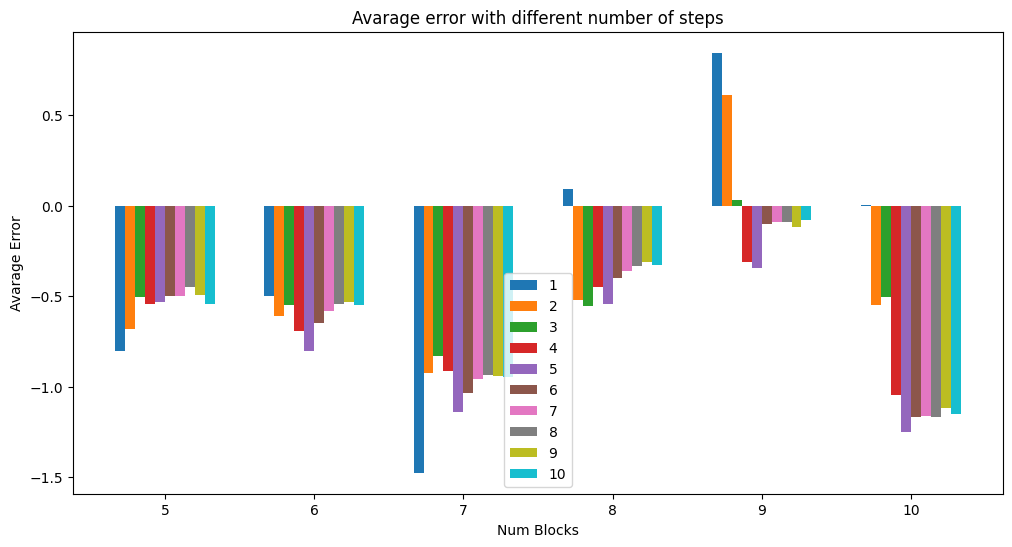

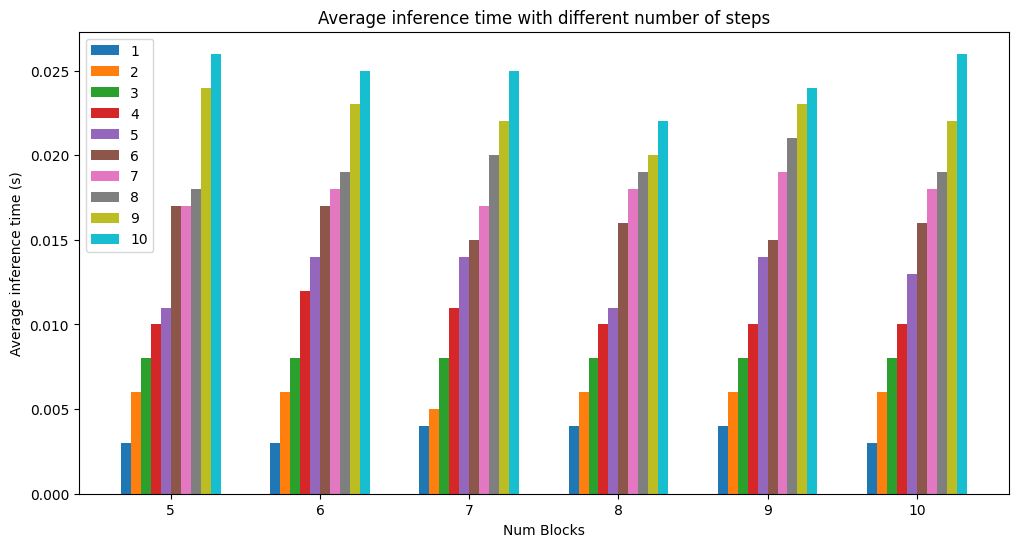

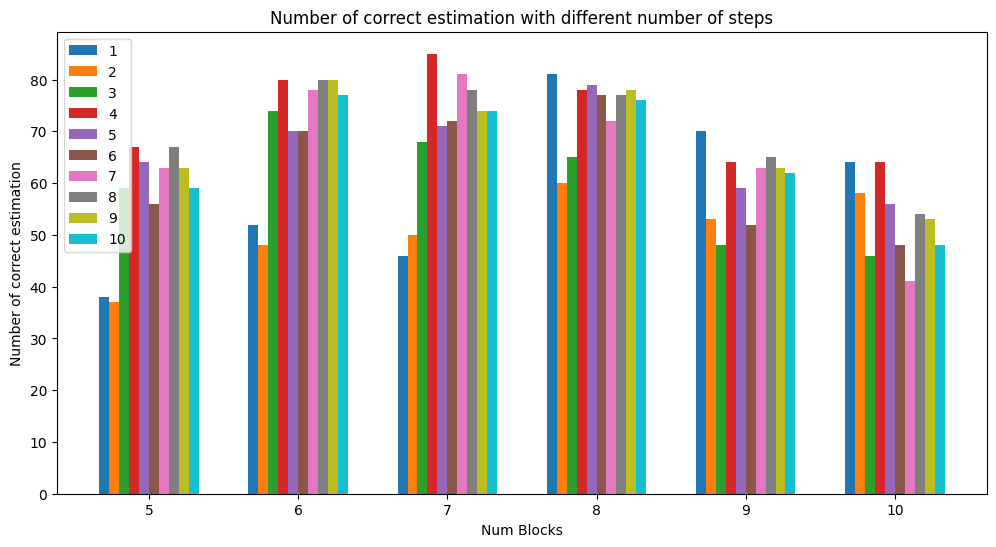

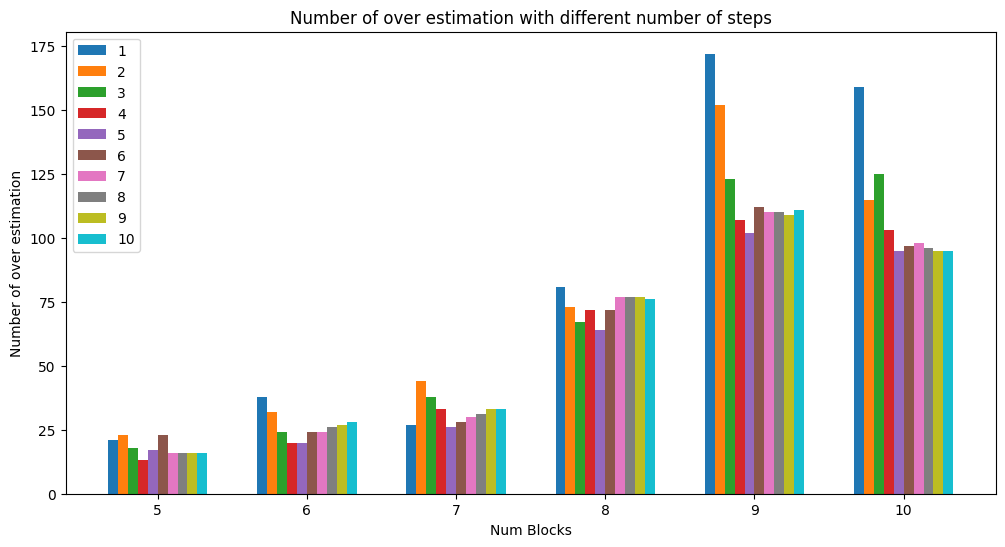

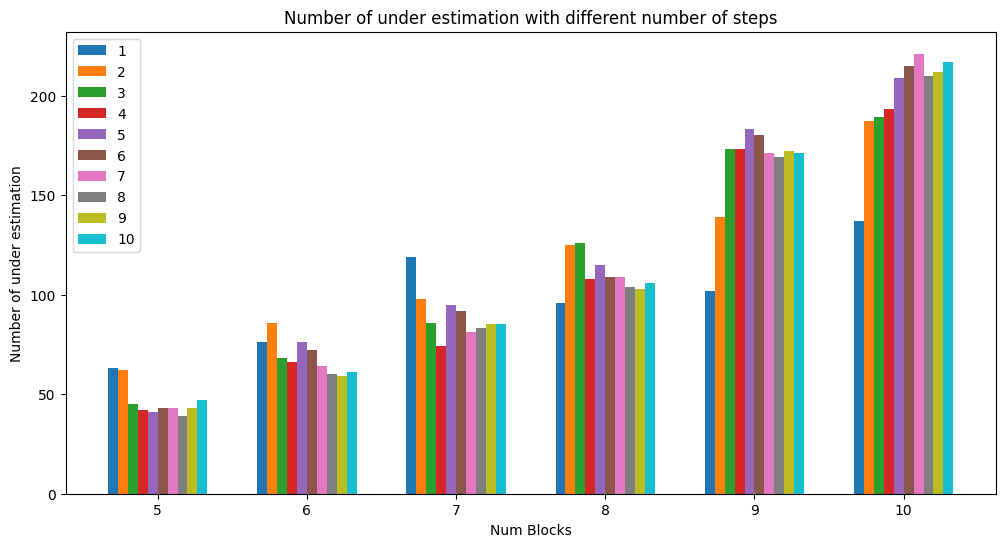

In [39]:

# Compute avg-error
avg_error_per_num_block = OrderedDict()
std_var_error_per_num_block = OrderedDict()
avg_mean_lenght_per_num_block = OrderedDict()
avg_inference_time = OrderedDict()
avg_time_delete_relaxation = OrderedDict()
avg_time_grounding = OrderedDict()
number_of_over_estimation_per_num_block = OrderedDict()
number_of_under_estimation_per_num_block = OrderedDict()
number_of_correct_estimation_per_num_block = OrderedDict()

for test_path in test_paths:
    
    with open(test_path, 'r') as f:
        data = json.load(f)


    # Divide results based on complexity

    num_block_dict = OrderedDict()
    for pddl_file in data.keys():
        # print(pddl_file)
        num_block = pddl_file.split('/')[-2]
        # print(num_block)
        if num_block_dict.get(num_block, None) is None:
            num_block_dict[num_block] = []
        num_block_dict[num_block].append(data[pddl_file])

    
    step = test_path.split('/')[-2].split('_')[-1]
   
    print(f"Performance with {step}")
    avg_error_per_num_block[step] = OrderedDict()
    std_var_error_per_num_block[step] = OrderedDict()
    avg_mean_lenght_per_num_block[step] = OrderedDict()
    avg_inference_time[step] = OrderedDict()
    avg_time_delete_relaxation[step] = OrderedDict()
    avg_time_grounding[step] = OrderedDict()
    number_of_over_estimation_per_num_block[step] = OrderedDict()
    number_of_under_estimation_per_num_block[step] = OrderedDict()
    number_of_correct_estimation_per_num_block[step] = OrderedDict()

    for num_block in num_block_dict.keys():
        
        mean_error = 0
        std_variation = []
        mean_inference_time = 0
        mean_time_delete_relaxation = 0
        mean_avg_time_grounding = 0
        number_of_over_estimation = 0
        number_of_under_estimation = 0
        number_of_correct_estimation = 0
        mean_lenght = 0
        num_problems = len(num_block_dict[num_block])
        for problem in num_block_dict[num_block]:
            error_list = np.array(problem["error_heuristic"])
            mean_error += np.mean(error_list)
            std_variation.append(mean_error)
            mean_inference_time += problem['inference_time']
            mean_time_delete_relaxation += problem['time_delete_relaxation']
            mean_avg_time_grounding += problem['time_strips']
            mean_lenght += len(problem["error_heuristic"])
            # state_value_pair.value-heuristic_val
            # if error > 0 -> over estimation
            number_of_over_estimation += np.count_nonzero(error_list > 0)
            number_of_under_estimation += np.count_nonzero(error_list < 0)
            number_of_correct_estimation += np.count_nonzero(error_list == 0)
        
        avg_error_per_num_block[step][num_block] = round(mean_error/num_problems,3)
        std_var_error_per_num_block[step][num_block] = np.std(std_variation)
        avg_inference_time[step][num_block] = round(mean_inference_time / num_problems, 3)
        avg_time_delete_relaxation[step][num_block] = round(mean_time_delete_relaxation /num_problems, 3)
        avg_time_grounding[step][num_block] = round(mean_avg_time_grounding / num_problems, 3)
        number_of_over_estimation_per_num_block[step][num_block] = number_of_over_estimation
        number_of_under_estimation_per_num_block[step][num_block] = number_of_under_estimation
        number_of_correct_estimation_per_num_block[step][num_block] = number_of_correct_estimation
        avg_mean_lenght_per_num_block[step][num_block] = mean_lenght/num_problems
        
        # print(
        #     f"Num blocks {num_block}\n\tAvg-lenght {avg_mean_lenght_per_num_block[step][num_block]}\n\tAvg-error {avg_error_per_num_block[step][num_block]}\n\tNum over estimation {number_of_over_estimation_per_num_block[step][num_block]}\n\tNum under estimation {number_of_under_estimation_per_num_block[step][num_block]}\n\tNum correct estimation {number_of_correct_estimation_per_num_block[step][num_block]}\n\tAvg inference time {avg_inference_time[step][num_block]}\n\tAvg delete relaxation {avg_time_delete_relaxation[step][num_block]}\n\tAvg time grounding {avg_time_grounding[step][num_block]}")
            
# plot_grouped_bar(metric_dict=avg_error_per_num_block,
#                     title = "Avarage error with different number of steps",
#                     ylabel="Avarage Error",
#                  stddev_dict=std_var_error_per_num_block)

plot_grouped_bar(metric_dict=avg_error_per_num_block,
                    title = "Avarage error with different number of steps",
                    ylabel="Avarage Error")

plot_grouped_bar(metric_dict=avg_inference_time,
                 title="Average inference time with different number of steps",
                 ylabel="Average inference time (s)")


plot_grouped_bar(metric_dict=number_of_correct_estimation_per_num_block,
                 title="Number of correct estimation with different number of steps",
                 ylabel="Number of correct estimation")

plot_grouped_bar(metric_dict=number_of_over_estimation_per_num_block,
                 title="Number of over estimation with different number of steps",
                 ylabel="Number of over estimation")

plot_grouped_bar(metric_dict=number_of_under_estimation_per_num_block,
                 title="Number of under estimation with different number of steps",
                 ylabel="Number of under estimation")
            

### Evolution of error

In [ ]:


with open("/raid/home/frosa_Loc/period_abroad/heuristic-computation/planning-learning-heuristic/STRIPS-HGN/results/train-strips-hgn-2024-06-14T15:36:31.043115/train-strips-hgn-2024-06-14T15:36:31.043115/generalization_distribution_step_10/test_stat.json", 'r') as f:
    data = json.load(f)

# Divide results based on complexity
num_block_dict = OrderedDict()
for pddl_file in data.keys():
    num_block = pddl_file.split('/')[-2]
    if num_block_dict.get(num_block) is None:
        num_block_dict[num_block] = []
    num_block_dict[num_block].append(data[pddl_file])

# Store errors for each problem associated with each num_block
errors_list_per_num_block = OrderedDict()
for num_block in num_block_dict.keys():
    errors_list_per_num_block[num_block] = []
    for problem in num_block_dict[num_block]:
        errors_list_per_num_block[num_block].append(
            np.array(problem["error_heuristic"]))

# Compute mean and standard deviation of errors for each step
mean_std_per_num_block = OrderedDict()
for num_block, error_lists in errors_list_per_num_block.items():
    max_length = max(len(error_list) for error_list in error_lists)
    mean_errors = []
    std_errors = []

    for step in range(max_length):
        step_errors = [error_list[step]
                    for error_list in error_lists if step < len(error_list)]
        mean_errors.append(np.mean(step_errors))
        std_errors.append(np.std(step_errors))

    mean_std_per_num_block[num_block] = (mean_errors, std_errors)

# Plotting the mean and standard deviation of errors for each num_block
for num_block, (mean_errors, std_errors) in mean_std_per_num_block.items():
    plt.figure(figsize=(10, 6))

    steps = range(len(mean_errors))
    mean_errors = np.array(mean_errors)
    std_errors = np.array(std_errors)

    plt.plot(steps, mean_errors, label='Mean Error')
    plt.fill_between(steps, mean_errors - std_errors, mean_errors +
                    std_errors, color='b', alpha=0.2, label='Std Dev')

    plt.title(f'Mean and Std Dev of Error for Num Blocks {num_block}')
    plt.xlabel('Steps')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)
    plt.show()

Number of block 5


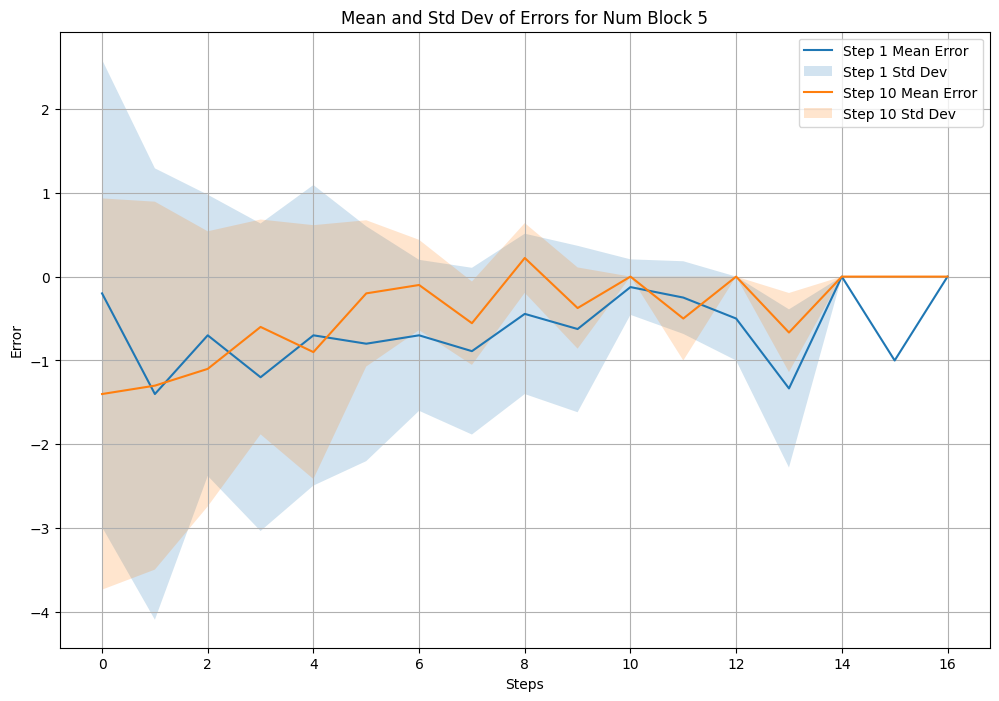

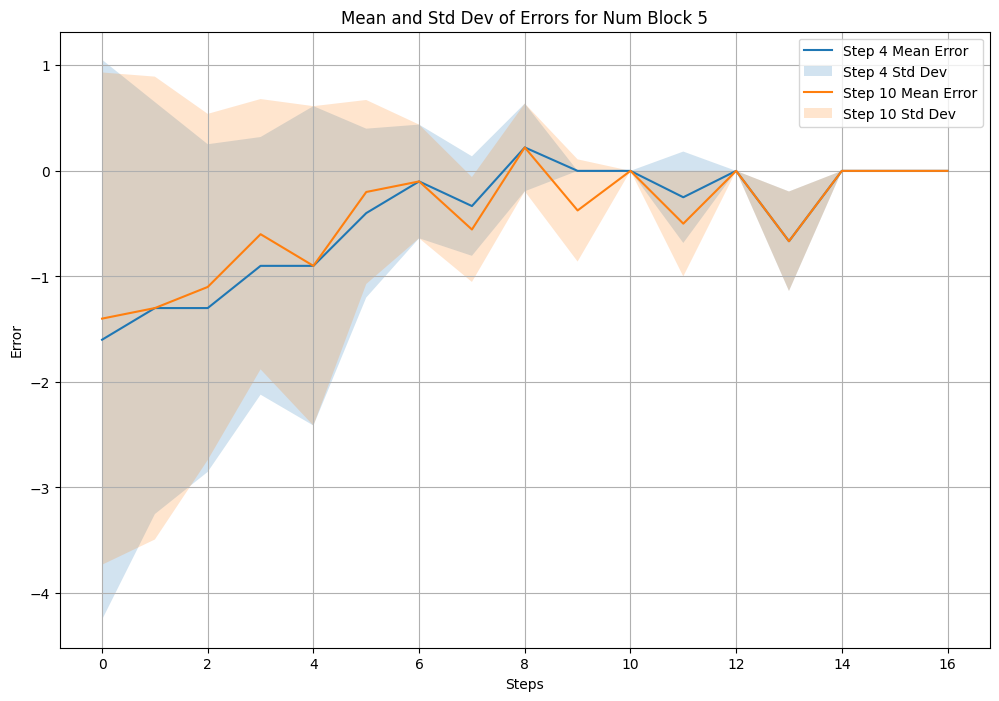

Number of block 6


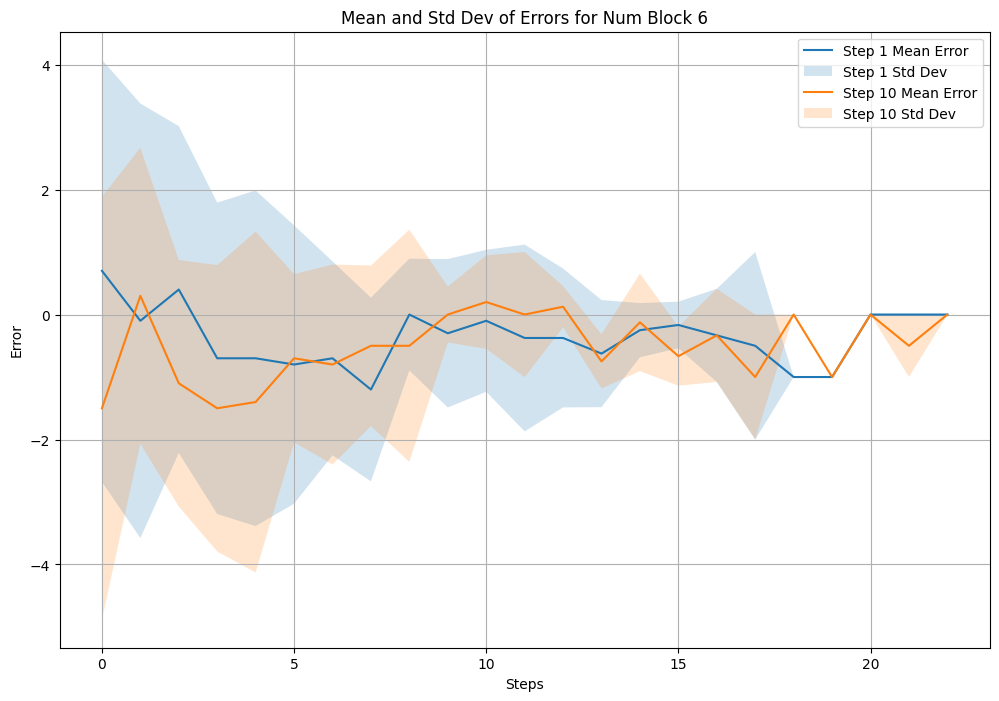

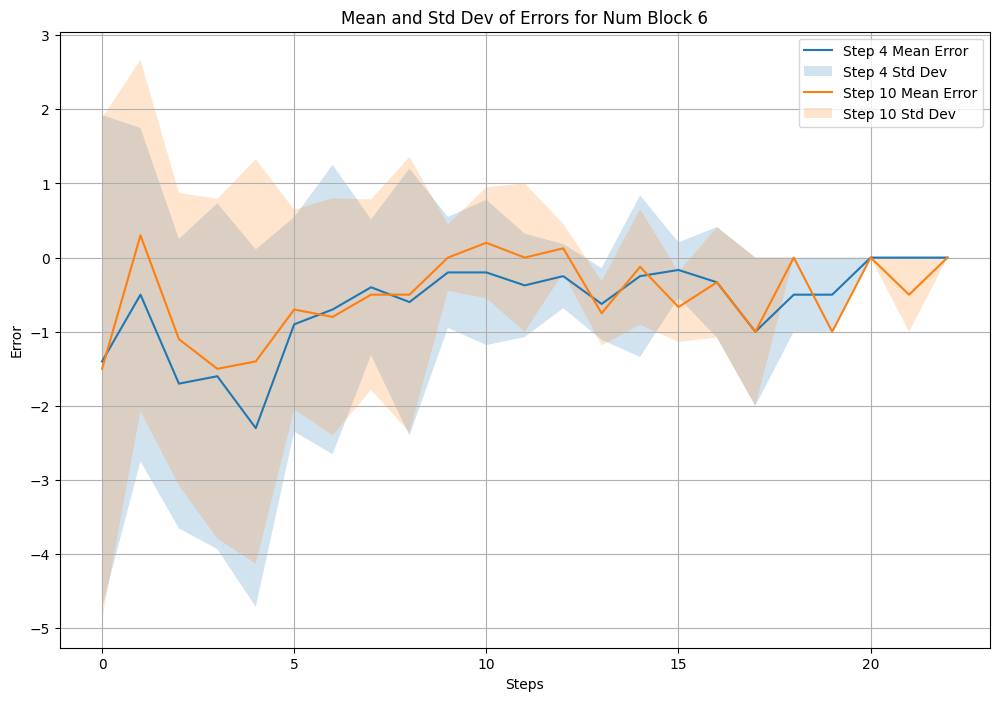

Number of block 7


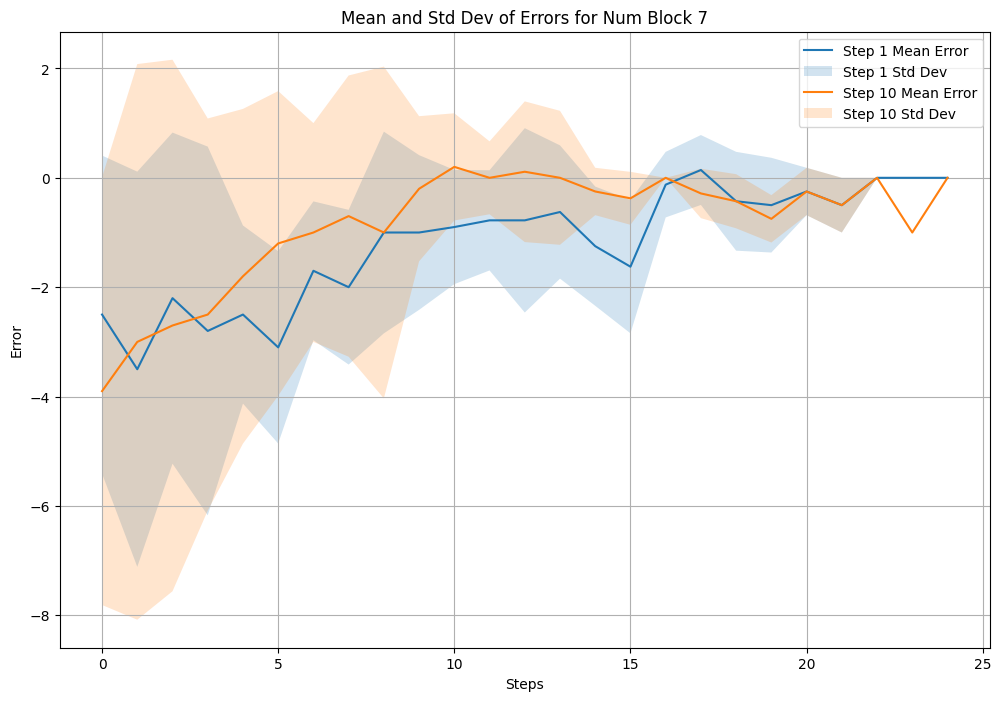

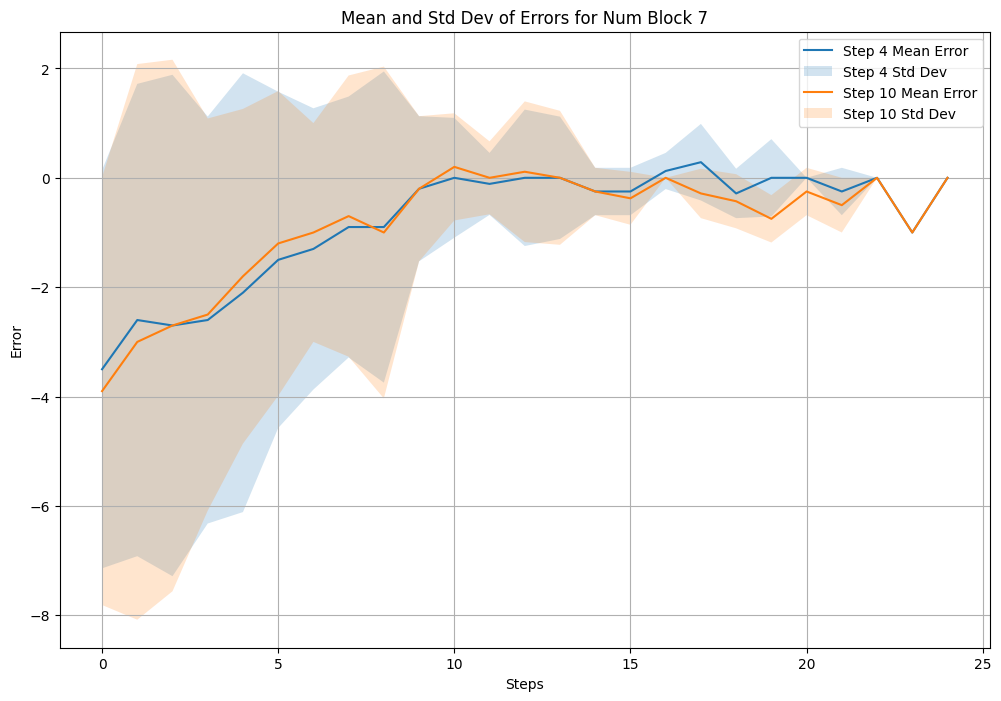

Number of block 8


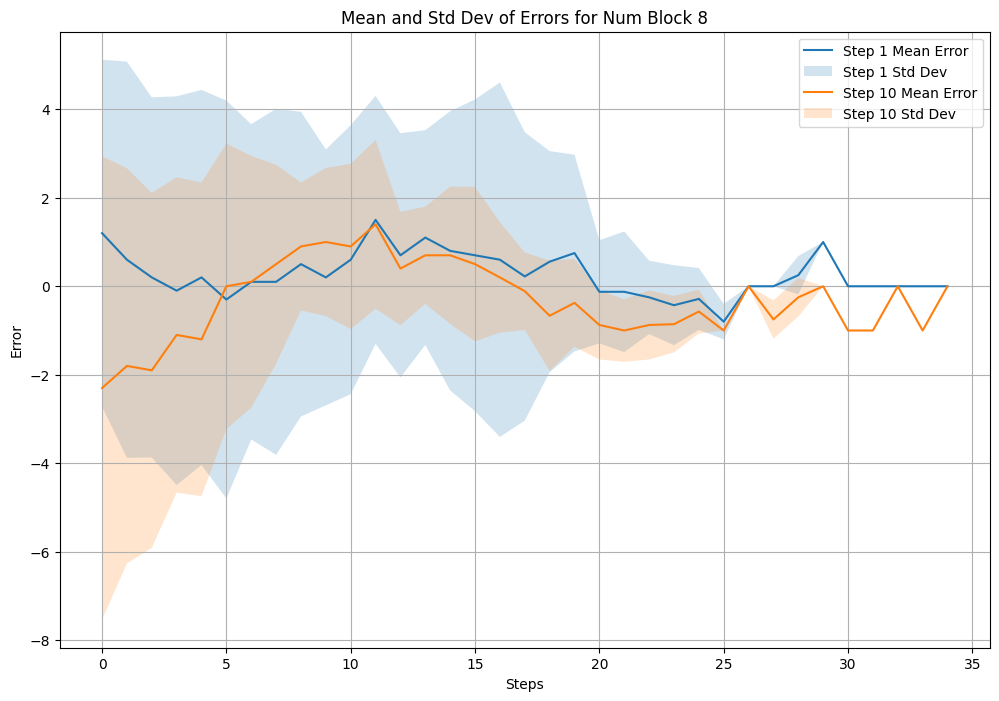

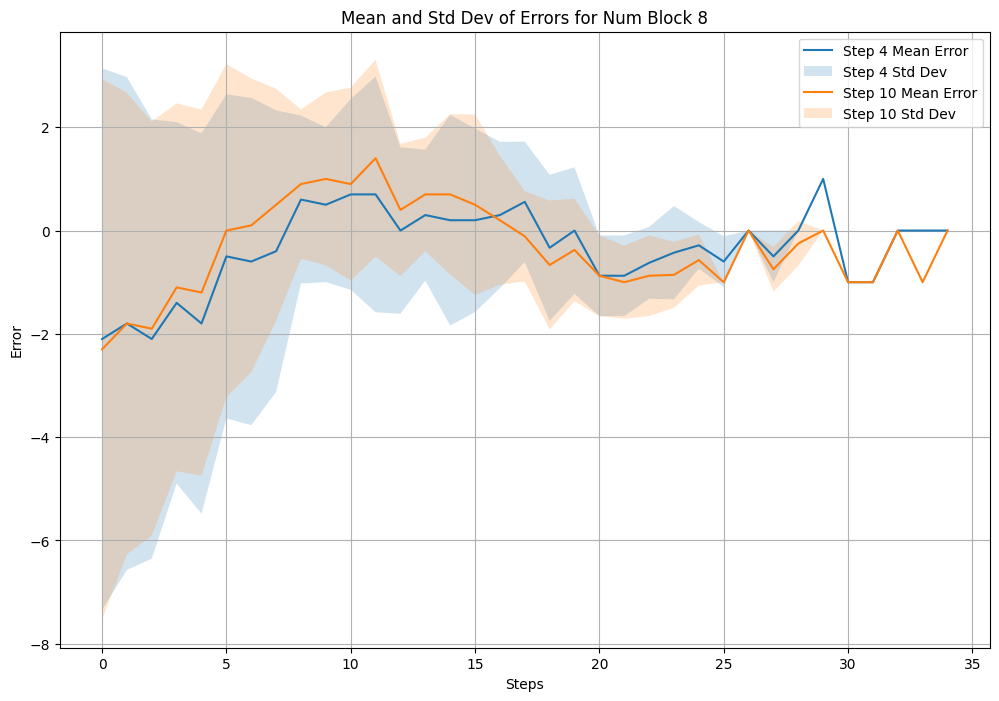

Number of block 9


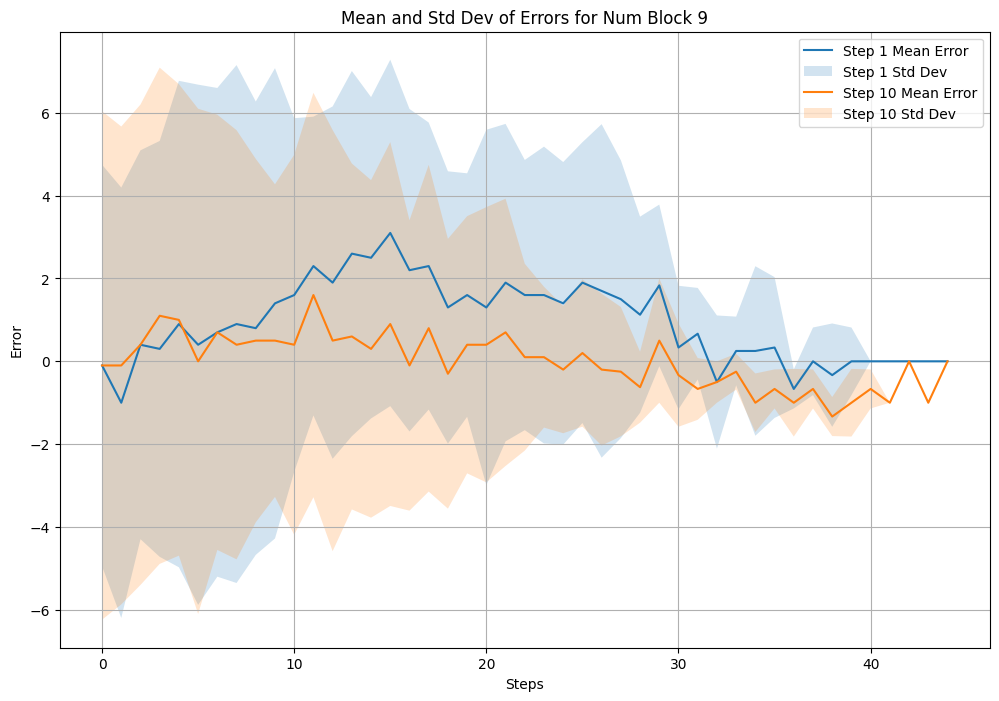

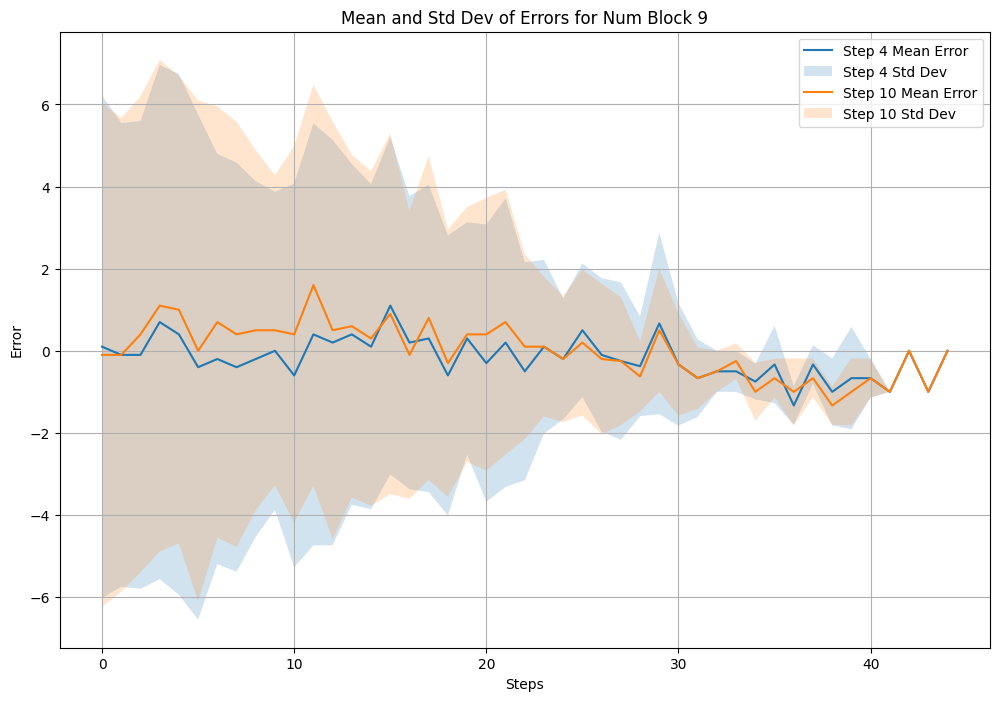

Number of block 10


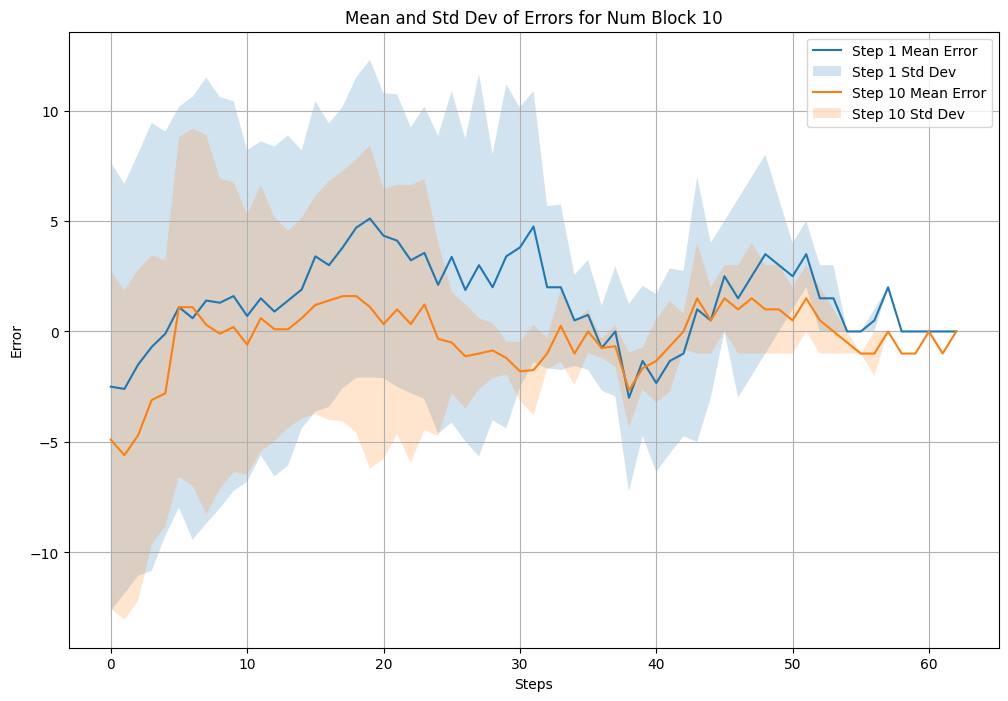

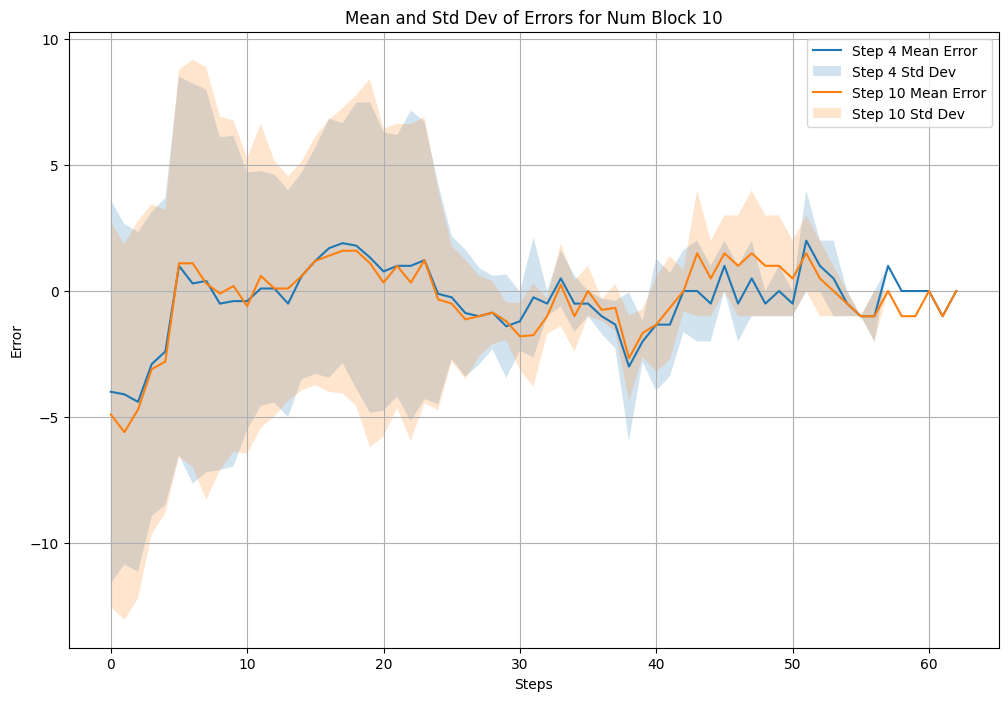

In [45]:
def divide_results_based_on_complexity(data):
    num_block_dict = OrderedDict()
    for pddl_file in data.keys():
        num_block = pddl_file.split('/')[-2]
        if num_block_dict.get(num_block) is None:
            num_block_dict[num_block] = []
        num_block_dict[num_block].append(data[pddl_file])
    return num_block_dict


def store_errors_for_each_problem(num_block_dict):
    errors_list_per_num_block = OrderedDict()
    for num_block in num_block_dict.keys():
        errors_list_per_num_block[num_block] = []
        for problem in num_block_dict[num_block]:
            errors_list_per_num_block[num_block].append(
                np.array(problem["error_heuristic"]))
    return errors_list_per_num_block


def compute_mean_std_errors(errors_list_per_num_block):
    mean_std_per_num_block = OrderedDict()
    for num_block, error_lists in errors_list_per_num_block.items():
        max_length = max(len(error_list) for error_list in error_lists)
        mean_errors = []
        std_errors = []

        for step in range(max_length):
            step_errors = [error_list[step]
                           for error_list in error_lists if step < len(error_list)]
            mean_errors.append(np.mean(step_errors))
            std_errors.append(np.std(step_errors))

        mean_std_per_num_block[num_block] = (mean_errors, std_errors)
    return mean_std_per_num_block


def plot_errors_for_num_block(num_block, mean_std_per_test_path, test_paths, step_of_interest):
    plt.figure(figsize=(12, 8))

    for test_path, (mean_errors, std_errors) in mean_std_per_test_path.items():
        steps = range(len(mean_errors))
        mean_errors = np.array(mean_errors)
        std_errors = np.array(std_errors)

        
        step = test_path.split('/')[-2].split('_')[-1]
        if step in step_of_interest:
            plt.plot(steps, mean_errors, label=f'Step {step} Mean Error')
            plt.fill_between(steps, mean_errors - std_errors, mean_errors + std_errors,
                            alpha=0.2, label=f'Step {step} Std Dev')

    plt.title(f'Mean and Std Dev of Errors for Num Block {num_block}')
    plt.xlabel('Steps')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)
    plt.show()



all_num_block_dicts = []
all_errors_list_per_num_block = []

# load error list for each step
for test_path in test_paths:
    with open(test_path, 'r') as f:
        data = json.load(f)
    
    # for a given step devide per number of blocks and get the error lists 
    num_block_dict = divide_results_based_on_complexity(data)
    # error list divided by number of blocks for a given step
    errors_list_per_num_block = store_errors_for_each_problem(
        num_block_dict)
    all_num_block_dicts.append(num_block_dict)
    all_errors_list_per_num_block.append(errors_list_per_num_block)

# Identify all unique num_block values
all_num_blocks = set()
for num_block_dict in all_num_block_dicts:
    all_num_blocks.update(num_block_dict.keys())
all_num_blocks = sorted(all_num_blocks, key=int)

# Generate plots for each num_block
for num_block in all_num_blocks:
    print(f"Number of block {num_block}")
    mean_std_per_test_path = OrderedDict()

    for i, test_path in enumerate(test_paths):
        errors_list_per_num_block = all_errors_list_per_num_block[i]
        if num_block in errors_list_per_num_block:
            mean_std_errors = compute_mean_std_errors(
                {num_block: errors_list_per_num_block[num_block]})
            mean_std_per_test_path[test_path] = mean_std_errors[num_block]

    plot_errors_for_num_block(
        num_block, mean_std_per_test_path, test_paths, step_of_interest=['1', '10'])
    
    plot_errors_for_num_block(
        num_block, mean_std_per_test_path, test_paths, step_of_interest=['4', '10'])